In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns

from scipy import stats

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

<h1>Loading datasets</h1>

<h5>Loading the training dataset:</h5>

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h5>Loading the testing dataset:</h5>

In [3]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train.shape

(1460, 81)

In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<h1>Exploring and cleaning the data</h1>
<p>Any changes made to the train dataset need to be done to the test dataset as well. The exact same changes. So that we can compare both of them later.</p>

<h5>Taking care of null values</h5>

In [6]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
#Another way to see null values in the dataset down below. That shows exactly all the columns with null values.
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
house_nulls = train[["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]].copy()
house_nulls.head()

,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN,NaN
1,NaN,TA,NaN,NaN,NaN
2,NaN,TA,NaN,NaN,NaN
3,NaN,Gd,NaN,NaN,NaN
4,NaN,TA,NaN,NaN,NaN


In [10]:
house_nulls.isnull().sum()

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

<h5>Droping the columns with too many null values</h5>

In [11]:
train = train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis = 1)

In [12]:
test = test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis = 1)

<h5>Filling the numeric columns with few null values with the mean</h5>

In [13]:
'''
Fullfilling the null values of LotFrontage with the mean, grouping by the MSZoning
'''

train['LotFrontage'] = train['LotFrontage'].fillna(train.groupby('MSZoning')['LotFrontage'].transform('mean').round(2))
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [14]:
'''
Fullfilling the null values of LotFrontage with the mean, grouping by the MSZoning
'''

test['LotFrontage'] = test['LotFrontage'].fillna(test.groupby('MSZoning')['LotFrontage'].transform('mean').round(2))
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

<h5>We still have some null values in the test dataset. So we are just gonna fill those null values with their mean</h5>

In [15]:
train  = train.fillna(train.mean())

In [16]:
test  = test.fillna(test.mean())

In [17]:
train.shape, test.shape

((1460, 75), (1459, 74))

In [18]:
train.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [19]:
test.isnull().sum()

MSSubClass        0
MSZoning          4
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        0
BsmtFinType2     42
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


<h5>Target variable</h5>
<p>Some analysis on target variable</p>

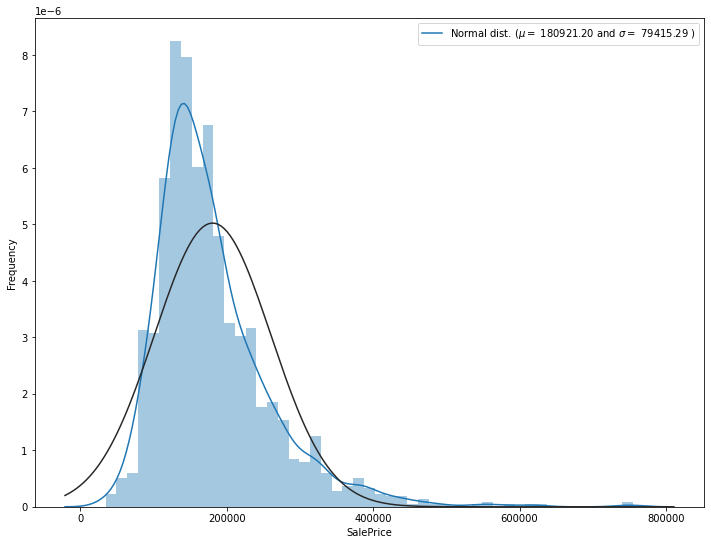

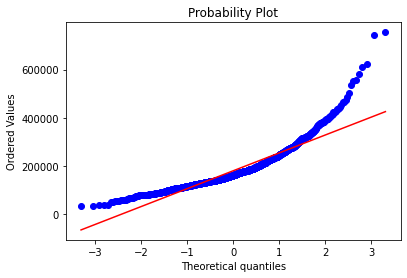

In [20]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<h5>We want the Normal Distribution</h5>
<p>As we can see in the first graphic, we have a Right Skewed distribution.</p>
<p>With right-skewed distribution (also known as "positively skewed" distribution), most data falls to the right, or positive side, of the graph's peak. These features ultimately make it difficult to assign a typical value as there is no clear center point on a right-skewed graph. By contrast, with normal distribution, because the mean, median, and mode are all equal and come at the center of the data set, you can easily use this value to more accurately generalize the data.</p>
<p>That's why we want the normal distribution.</p>

<h5>Turning the right skewed distribution into a Normal distribution with a log function</h5>

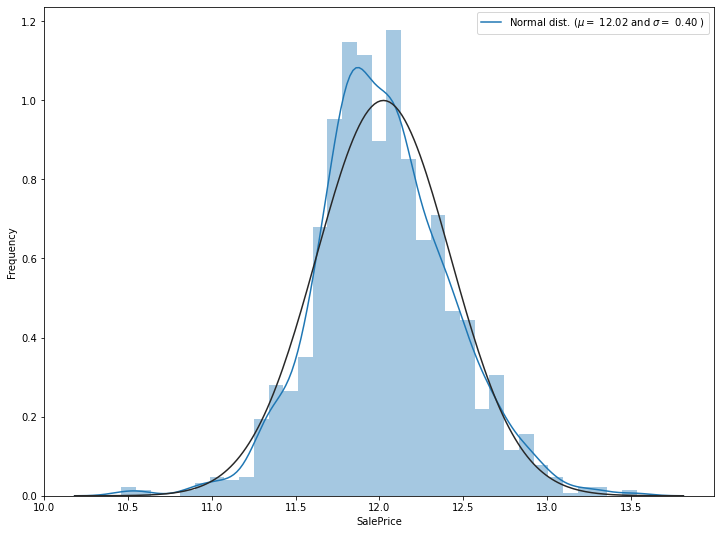

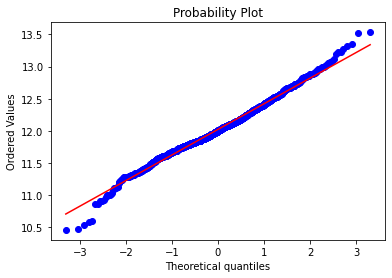

In [21]:
#Using Numpy log function
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<h1>Looking for correlations</h1>

In [22]:
train_corr = train.select_dtypes(include = [np.number])
train_corr.shape

(1460, 37)

<AxesSubplot:>

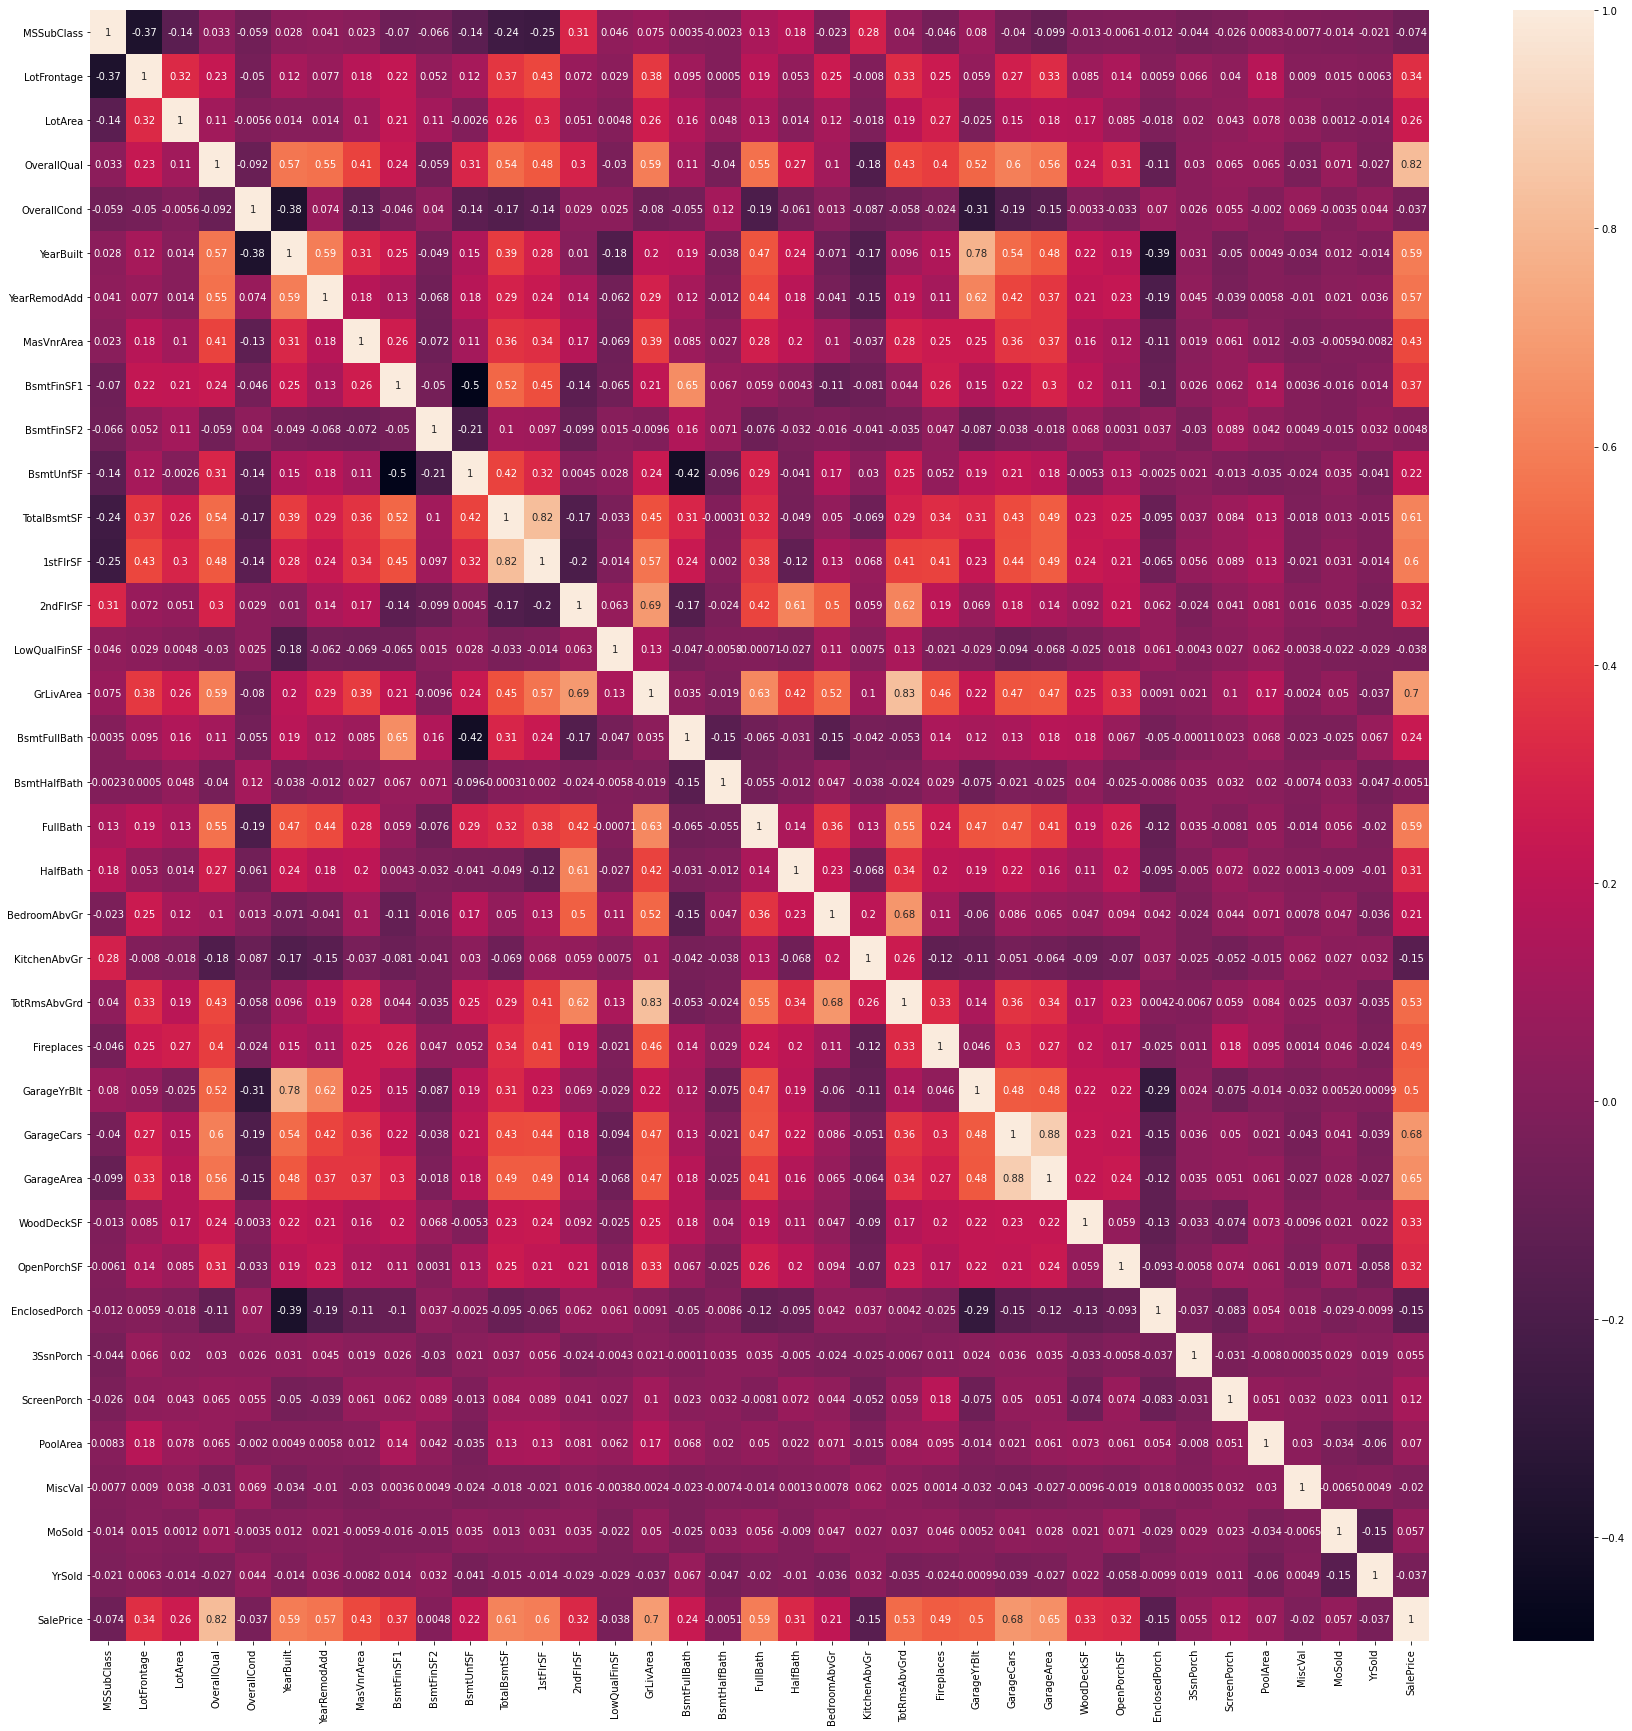

In [23]:
corr = train_corr.corr()
plt.subplots(figsize = (30,30))
sns.heatmap(corr, annot = True)

<h5>The biggest correlations</h5>
<p>Now we wanna spot the biggest correlations (positive or negative) features with the target value - SalePrice.
</p>

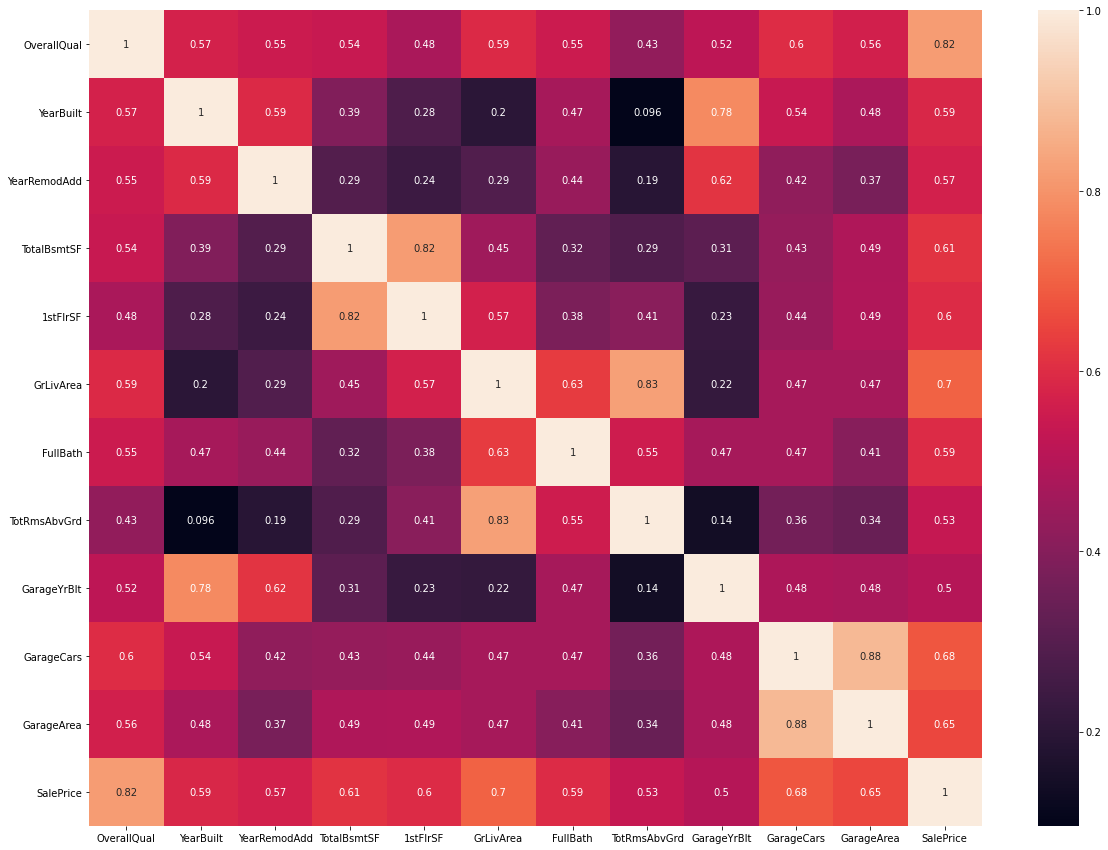

In [24]:
top_feature = corr.index[abs(corr['SalePrice'] > 0.5)]

plt.subplots(figsize = (20, 15))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot = True)
plt.show()

<h5>OverallQual has the greatest correlation of all. We wanna se his unique values.</h5>

In [25]:

train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

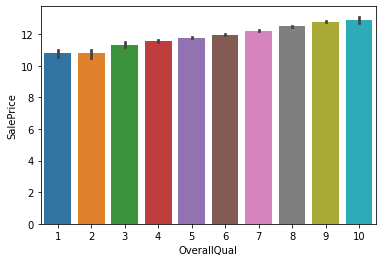

In [26]:
sns.barplot(train.OverallQual, train.SalePrice)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

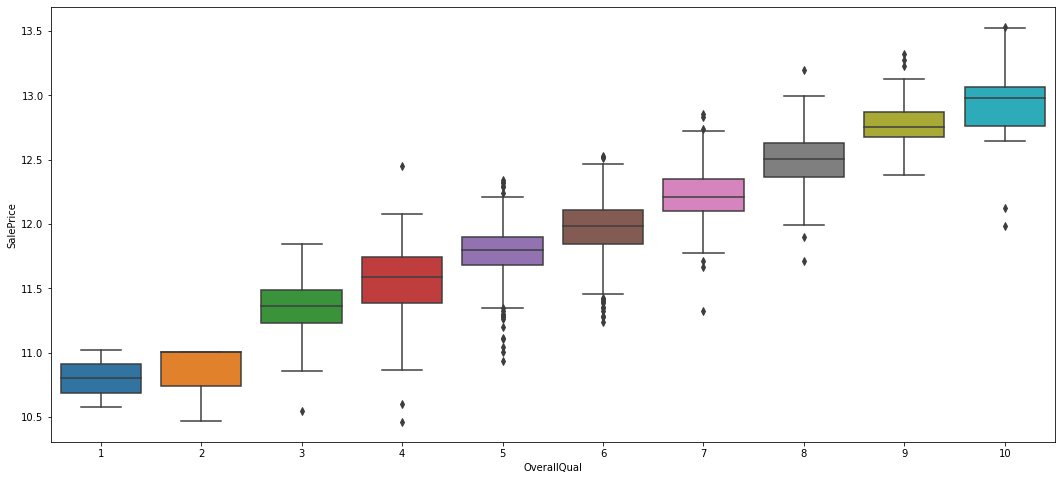

In [27]:
plt.figure(figsize = (18,8))
sns.boxplot(x = train.OverallQual, y = train.SalePrice)

<h1>Standardizing values in strings</h1>
<p>Predictive models only accept numerical values. Therefore, the variables of interest whose values are strings need to be standardized.</p>

In [28]:
'''
Here we created a class to turn strings into numbers.
'''
from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import Pipeline

class PadronizacaoStrings:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self 

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    


In [29]:
train = (PadronizacaoStrings(columns = train.columns).fit_transform(train))

In [30]:
test = (PadronizacaoStrings(columns = test.columns).fit_transform(test))

In [31]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,39,327,1,3,3,0,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,129,2,4,2,2,3,3,2,361,5,0,73,179,1,0,1,4,134,232,0,531,1,0,2,1,3,1,2,6,6,0,1,90,1,2,220,4,4,2,0,49,0,0,0,0,0,1,2,8,4,412
1,0,3,55,498,1,3,3,0,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,2,0,3,4,1,2,3,1,0,482,5,0,167,441,1,0,1,4,427,0,0,259,0,1,2,0,3,1,3,4,6,1,1,62,1,2,149,4,4,2,187,0,0,0,0,0,0,4,1,8,4,339
2,5,3,42,702,1,0,3,0,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,105,2,4,2,2,3,2,2,222,5,0,278,214,1,0,1,4,178,239,0,570,1,0,2,1,3,1,2,4,6,1,1,88,1,2,260,4,4,2,0,30,0,0,0,0,0,8,2,8,4,442
3,6,3,34,489,1,0,3,0,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,2,0,3,4,0,3,1,3,0,66,5,0,346,117,1,2,1,4,208,180,0,536,1,0,1,0,3,1,2,5,6,1,5,85,2,3,284,4,4,2,0,24,108,0,0,0,0,1,0,8,0,194
4,5,3,59,925,1,0,3,0,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,222,2,4,2,2,3,0,2,328,5,0,318,370,1,0,1,4,347,320,0,734,1,0,2,1,4,1,2,7,6,1,1,87,1,3,380,4,4,2,118,70,0,0,0,0,0,11,2,8,4,494


In [32]:
train.shape

(1460, 75)

In [33]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,61,777,1,3,3,0,4,0,12,1,2,0,2,4,5,56,11,1,0,10,12,2,0,3,4,1,3,3,3,4,228,3,32,172,202,0,4,1,3,177,0,0,64,0,0,1,0,2,1,3,2,6,0,1,46,2,1,349,3,4,2,75,0,0,0,18,0,0,5,4,8,4
1,0,3,62,964,1,0,3,0,0,0,12,2,2,0,2,5,5,53,8,3,0,11,13,1,59,3,4,1,3,3,3,0,479,5,0,275,478,0,4,1,3,474,0,0,313,0,0,1,1,3,1,2,3,6,0,1,43,2,1,67,3,4,2,225,24,0,0,0,0,24,5,4,8,4
2,5,3,55,947,1,0,3,0,4,0,8,2,2,0,4,4,4,92,48,1,0,10,12,2,0,3,4,2,2,3,3,2,418,5,0,70,234,0,2,1,3,200,169,0,518,0,0,2,1,3,1,3,3,6,1,1,83,0,3,180,3,4,2,134,22,0,0,0,0,0,2,4,8,4
3,5,3,59,587,1,0,3,0,4,0,8,2,2,0,4,5,5,93,48,1,0,10,12,1,6,3,4,2,3,3,3,2,311,5,0,212,233,0,0,1,3,199,157,0,500,0,0,2,1,3,1,2,4,6,1,1,84,0,3,168,3,4,2,219,24,0,0,0,0,0,5,4,8,4
4,11,3,19,118,1,0,1,0,4,0,22,2,2,4,2,7,4,87,42,1,0,6,6,2,0,2,4,2,2,3,3,0,107,5,0,602,456,0,0,1,3,447,0,0,282,0,0,2,0,2,1,2,2,6,0,1,78,1,3,199,3,4,2,0,68,0,0,27,0,0,0,4,8,4


In [34]:
test.shape

(1459, 74)

<h1>Creating the Model</h1>

<h5>Creating a new dataframe with the most important features related with the target.</h5>

<h5>How many features do we need?</h5>
<p>We have 74 four features in total. But do we need to use all of them?
   Right down below we are going to find out what is the best number of features to use. To do that, we are going to use the RFE function that returns as an output the scores for the number of features. In the end, we will have the number of features with the highest score.  </p>

In [ ]:
'''
#no of features
nof_list=np.arange(1,75)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = GradientBoostingRegressor(n_estimators=100, max_depth=4)
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
'''

In [ ]:
'''
Optimum number of features: 22
Score with 22 features: 0.883734
'''

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

<h5>Picking a smaller number of features</h5>
<p>As we demonstrated, the best number of features is 22. So we are gonna pick the best 22 features with a RFE function. </p>

In [36]:
#The only goal of those variables is to find the best features.
array = train.values
W = array[:,:-1]
z = array[:,-1]

In [37]:

clf = LogisticRegression()
rfe = RFE(clf, n_features_to_select=22)
fit = rfe.fit_transform(W, z)
columns_retained_RFE = train.iloc[:, 1:].columns[rfe.get_support()].values

In [38]:
columns_retained_RFE

array(['MSZoning', 'LotArea', 'Street', 'Condition1', 'YearRemodAdd',
       'RoofStyle', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'GarageFinish', 'GarageQual',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea'],
      dtype=object)

<h5>Now i am gonna assign the 22 best features to the variables that are gonna be used to train the model.</h5>

In [39]:
X = train[columns_retained_RFE]
X.head()

,MSZoning,LotArea,Street,Condition1,YearRemodAdd,RoofStyle,Exterior2nd,MasVnrType,ExterQual,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,2ndFlrSF,LowQualFinSF,BsmtFullBath,GarageFinish,GarageQual,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea
0,3,327,1,2,53,1,13,1,2,5,73,179,1,232,0,1,1,4,49,0,0,0
1,3,498,1,1,26,1,8,2,3,5,167,441,1,0,0,0,1,4,0,0,0,0
2,3,702,1,2,52,1,13,1,2,5,278,214,1,239,0,1,1,4,30,0,0,0
3,3,489,1,2,20,1,15,2,3,5,346,117,1,180,0,1,2,4,24,108,0,0
4,3,925,1,2,50,1,13,1,2,5,318,370,1,320,0,1,1,4,70,0,0,0


In [40]:
y = train['SalePrice']
y.head()

0    412
1    339
2    442
3    194
4    494
Name: SalePrice, dtype: int64

<h1>Trying Some Models</h1>
<p>We are going to try many models with the cleansed data in order to find the best model. To test many algorithms at once we are gonna use some for loops and the k-fold splitting method. Then we are gonna use the cross_val_score function to calculate the model with the least negative square root mean error.</p>

In [42]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('RidgeCV', RidgeCV()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('Gradient Boost', GradientBoostingRegressor()))
models.append(('Deep Learning', MLPRegressor()))

# evaluate each model in turn
results = []
names = []
plota_names = []
plota_acuracia = []



for name, model in models:
    kf = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines, testing_lines in kf.split(X,y):
       
        kf = model_selection.KFold(10, shuffle=True, random_state = 1)
        X_train, X_test = X[training_lines], X[testing_lines]
        y_train, y_test = y[training_lines], y[testing_lines]

        cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
        results.append(cv_results)
        names.append(name)

        print('%s => neg_root_mean_squared_error: %f, Standard Deviation: (%f)' % (name, -cv_results.mean(), cv_results.std()))

        hit_rate += cv_results.mean()
        
    #plota_names.append(names)
    #plota_acuracia.append(hit_rate/10)

    final_accuracy = hit_rate/10   
    print("Média das 10 acurácias: ",-final_accuracy)
    #print("Desvio padrão da média final :",hit_rate.std())
    print()'''

<h5>GradientBoost has the best results in my tests. So that's what we are gonna use it.</h5>

In [ ]:
#I came into an issue running the code down below. I found the solution in Stack Overflow:
#https://stackoverflow.com/questions/55667169/key-error-none-of-int64index-dtype-int64-are-in-the-columns

In [43]:
X.shape

(1460, 22)

In [44]:
y.shape

(1460,)

In [45]:
test.shape

(1459, 22)

In [46]:
from sklearn.model_selection import cross_val_predict

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=10)

for k in range(2,12):
    y_pred = cross_val_predict(gbr, X, y, cv=k)


In [52]:
previsoes = y_pred.copy()


In [53]:
previsoes

array([420.63764578, 263.47700315, 408.52360118, ..., 544.11618939,
       195.91582147, 329.17763338])

In [54]:
previsoes = pd.DataFrame(previsoes, columns=['SalePrice'])
previsoes.head()

,SalePrice
0,420.637646
1,263.477003
2,408.523601
3,311.181782
4,583.653816


In [55]:
previsoes.shape, test.shape

((1460, 1), (1459, 22))

In [56]:

previsoes = previsoes.iloc[1: , :]

In [57]:
previsoes['SalePrice'] = previsoes.apply(lambda x: round(x.SalePrice,2), axis=1)

In [58]:
previsoes.head()

,SalePrice
1,263.48
2,408.52
3,311.18
4,583.65
5,198.36


In [68]:
sub = pd.concat([test['Id'],previsoes], axis=1)
sub.columns=['Id','SalePrice']

In [69]:
sub.to_csv('submission.csv',index=False)
